In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
insurance_data = pd.read_csv('Medicalpremium.csv')

In [3]:
insurance_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
insurance_data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [6]:
insurance_data.shape

(986, 11)

In [7]:
insurance_data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<Figure size 1100x1100 with 0 Axes>

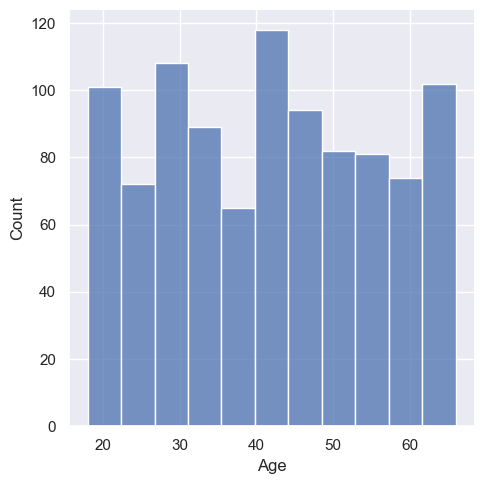

In [9]:
sns.set()
plt.figure(figsize=(11,11))
sns.displot(insurance_data['Age'])
plt.show()

In [10]:
insurance_data['Age'].value_counts()

Age
43    30
27    27
42    27
35    26
45    25
59    25
48    24
25    24
44    24
46    23
18    23
66    23
33    23
49    23
64    22
24    22
30    22
29    22
47    22
32    22
62    21
21    21
19    21
51    20
50    20
31    20
54    20
40    19
22    19
52    19
36    19
63    19
37    18
41    18
34    18
38    17
60    17
55    17
65    17
53    17
20    17
28    17
58    16
61    16
56    15
26    13
23    13
57    12
39    11
Name: count, dtype: int64

<Figure size 1100x1100 with 0 Axes>

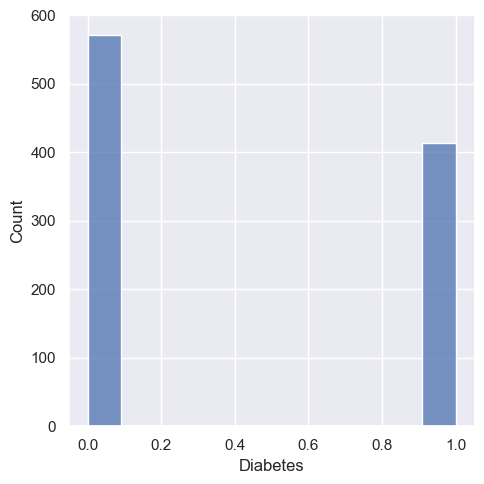

In [11]:
sns.set()
plt.figure(figsize=(11,11))
sns.displot(insurance_data['Diabetes'])
plt.show()

In [12]:
insurance_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [15]:
input_data = insurance_data.drop(columns='PremiumPrice')
output_data = insurance_data['PremiumPrice']

In [16]:
input_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0
982,64,1,1,0,0,153,70,0,0,3
983,56,0,1,0,0,155,71,0,0,1
984,47,1,1,0,0,158,73,1,0,1


In [17]:
output_data

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

In [18]:
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2)

In [19]:
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(986, 10) (788, 10) (198, 10)


In [20]:
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(986,) (788,) (198,)


In [21]:
model = RandomForestRegressor(n_estimators=100, max_depth=12)

In [22]:
model.fit(input_train_data, output_train_data)

RandomForestRegressor(max_depth=12)

In [23]:
test_data_predictions = model.predict(input_test_data) 

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(test_data_predictions,output_test_data)

0.6754169695443728

In [26]:
input_data = (45, 0,0,0, 0, 155,57,0,0,0)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)

In [29]:
insurance_premium = model.predict(input_data_array)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
insurance_premium[0]

np.float64(24881.818181818184)

In [30]:
import pickle as pkl

In [31]:
pkl.dump(model, open('MIPML.pkl','wb'))